## Previo

In [1]:
from sys import path
from os.path import abspath
from platform import system
NombreSO = system()
path.append(abspath('..'))


In [2]:
abspath("..") in path

True

In [3]:
from funciones import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.classification import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from copulas.visualization import compare_3d
from sdv.metadata import SingleTableMetadata
from sdv.single_table import GaussianCopulaSynthesizer, CTGANSynthesizer, TVAESynthesizer, CopulaGANSynthesizer
from sdv.evaluation.single_table import run_diagnostic, evaluate_quality, get_column_plot
pd.set_option('display.max_columns', None)
import matplotlib
matplotlib.rcParams["font.family"] = "DejaVu Sans"

## Primer Análisis

In [4]:
DataPrincipal = pd.read_csv("../data/ParkinsonData.csv")

In [5]:
DataPrincipal

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [6]:
DataPrincipal.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [7]:
DataPrincipal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [8]:
DataPrincipal.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


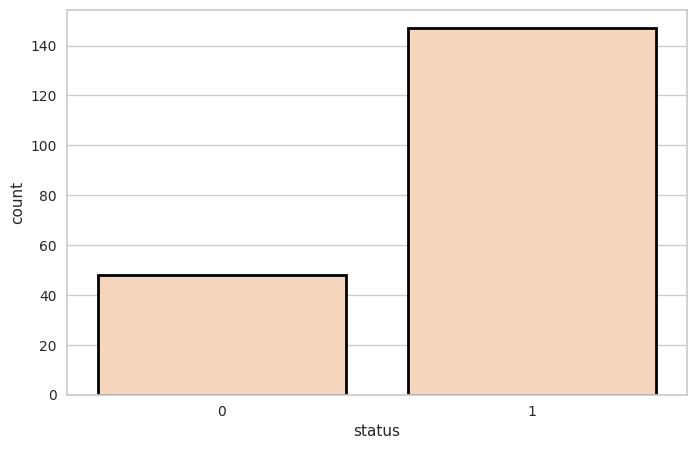

In [9]:
plt.figure(figsize = (8,5))
sns.countplot(data = DataPrincipal, x = "status", color = "#ffd4b1", edgecolor = "black", linewidth = 2);
plt.savefig('../data/imagenes/grafica1.png', dpi=300, bbox_inches='tight')
# img = plt.imread("../data/imagenes/grafica1.png")
# plt.axis('off')
# plt.imshow(img)

In [10]:
print("Número de pacientes con Parkinson:", DataPrincipal[DataPrincipal["status"] == 1]["status"].count())
print("Número de pacientes sin Parkinson:", DataPrincipal[DataPrincipal["status"] == 0]["status"].count())

Número de pacientes con Parkinson: 147
Número de pacientes sin Parkinson: 48


Como vemos, tenemos una notable diferencia entre el número de pacientes con Parkinson y los que no, hay varias maneras de solucionar esto pero yo he elegido crear datos sintéticos a partir de los datos de sujetos sin Parkinson hasta que llegue al número de sujetos con Parkinson.

**Vamos a eliminar unos registros aleatorios de sujetos enfermos hasta dejarlos en 120 para que el número de datos sintéticos de sujetos sanos no supere el 61%.**

## Tratamiento de datos

In [11]:
DataPrincipal

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [12]:
print(len(DataPrincipal[DataPrincipal["status"] == 1]) - 120)

27


In [13]:
for i in range(27):
  DataPrincipal.drop(index = np.random.choice(DataPrincipal[DataPrincipal["status"] == 1].index), inplace = True)
DataPrincipal.reset_index(drop = True, inplace = True)

In [14]:
print("Número de pacientes con Parkinson:", DataPrincipal[DataPrincipal["status"] == 1]["status"].count())
print("Número de pacientes sin Parkinson:", DataPrincipal[DataPrincipal["status"] == 0]["status"].count())

Número de pacientes con Parkinson: 120
Número de pacientes sin Parkinson: 48


In [15]:
# DataPrincipal = Abrir("DataPrincipalTratada")

**Ahora debemos generar los datos sintéticos.**

Cómo queremos datos sintéticos solo de los pacientes sanos, pero también queremos que los campos parámetros sean distintos entre los pacientes sanos y enfermos debemos crear datos sintéticos de todos los registros tanto sanos como enfermos y luego solo seleccionar los pacientes enfermos. El campo name se va a quedar para ahorrarnos el trabajo de crear nuevos valores inventados para este campo y poder seguir identificando cada uno de los registros.

## Prueba de algoritmos para la generación de datos sintéticos

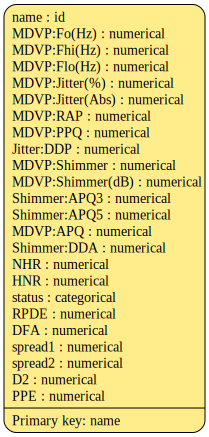

In [16]:
Metadata = SingleTableMetadata()
Metadata.detect_from_dataframe(DataPrincipal)
Metadata.visualize()

Como vemos el campo name es de tipo id por lo que no se va a comprobar la relación que tiene con los otros campos para crear los datos sintéticos ya que es solo un identificador.

In [17]:
Metadata.validate_data(data=DataPrincipal)

### CTGAN Synthesizer

##### Ejecutar si:
* En la carpeta data/variables no está el archivo correspondiente a tu sistema operativo.
* Quieres ejecutar el entrenamiento por tu cuenta.

In [18]:
# Synthesizer = CTGANSynthesizer(Metadata, verbose = True)
# Synthesizer.fit(DataPrincipal)

In [19]:
# if NombreSO == "Windows":
#     Guardar(Synthesizer, "Windows_CTGANSynthesizer")
# elif NombreSO == "Linux":
#     Guardar(Synthesizer, "Linux_CTGANSynthesizer")
# elif NombreSO == "Darwin":
#     Guardar(Synthesizer, "MacOS_CTGANSynthesizer")
# elif NombreSO == "Java":
#     Guardar(Synthesizer, "JVM_CTGANSynthesizer")
# else:
#     Guardar(Synthesizer, NombreSO + "CTGANSynthesizer")

##### Seguir ejecución

In [20]:
if NombreSO == "Windows":
    Synthesizer = Abrir("Windows_CTGANSynthesizer")
elif NombreSO == "Linux":
    Synthesizer = Abrir("Linux_CTGANSynthesizer")
elif NombreSO == "Darwin":
    Synthesizer = Abrir("MacOS_CTGANSynthesizer")
elif NombreSO == "Java":
    Synthesizer = Abrir("JVM_CTGANSynthesizer")
else:
    Synthesizer = Abrir(NombreSO + "CTGANSynthesizer")

In [21]:
120 - 48

72

Crearemos más del doble de datos sintéticos de los que necesitamos porque solo necesitaremos los datos sintéticos de pacientes sanos.

In [22]:
DataSintetico = Synthesizer.sample(num_rows=500)
DataSintetico.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,sdv-id-loEApG,161.239,276.695,68.755,0.00282,0.000260,0.00075,0.00524,0.00496,0.06361,0.128,0.00748,0.00925,0.00719,0.04686,0.00219,25.035,0,0.569884,0.697011,-7.540923,0.148816,1.988682,0.044539
1,sdv-id-RpHSSn,103.445,163.426,115.985,0.00174,0.000260,0.00436,0.00374,0.00633,0.04289,0.219,0.01551,0.00673,0.02654,0.05536,0.00353,25.110,1,0.511147,0.619286,-7.886705,0.171578,2.830844,0.144455
2,sdv-id-RJYFhr,98.407,169.331,181.294,0.00174,0.000007,0.00075,0.00711,0.00283,0.01584,0.695,0.00524,0.00994,0.02933,0.02923,0.00065,18.711,1,0.539427,0.602420,-5.850794,0.268808,2.408513,0.153592
3,sdv-id-MVmVvH,222.583,130.211,208.346,0.00222,0.000007,0.00108,0.00096,0.00345,0.05057,0.666,0.02444,0.02547,0.08268,0.03982,0.00065,21.435,1,0.540016,0.605383,-7.810340,0.178913,2.570240,0.148538
4,sdv-id-DzaUAE,134.545,227.588,83.692,0.00174,0.000260,0.00904,0.00653,0.00225,0.05082,0.418,0.01880,0.00570,0.02516,0.10410,0.00065,26.706,0,0.633753,0.768143,-4.783869,0.159667,2.512032,0.092892


In [23]:
Diagnostico = run_diagnostic(
    real_data=DataPrincipal,
    synthetic_data=DataSintetico,
    metadata=Metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 24/24 [00:00<00:00, 1203.21it/s]|
Data Validity Score: 99.73%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 334.34it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 99.87%



**Nuestros datos sintéticos siguen el mismo formato que los originales**

In [24]:
Calidad = evaluate_quality(
    DataPrincipal,
    DataSintetico,
    Metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 534.75it/s]|
Column Shapes Score: 68.37%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:01<00:00, 146.50it/s]|
Column Pair Trends Score: 73.48%

Overall Score (Average): 70.92%



**Nuestros datos sintéticos tienen una similaridad de más del 70% con respecto a nuestros datos originales.**

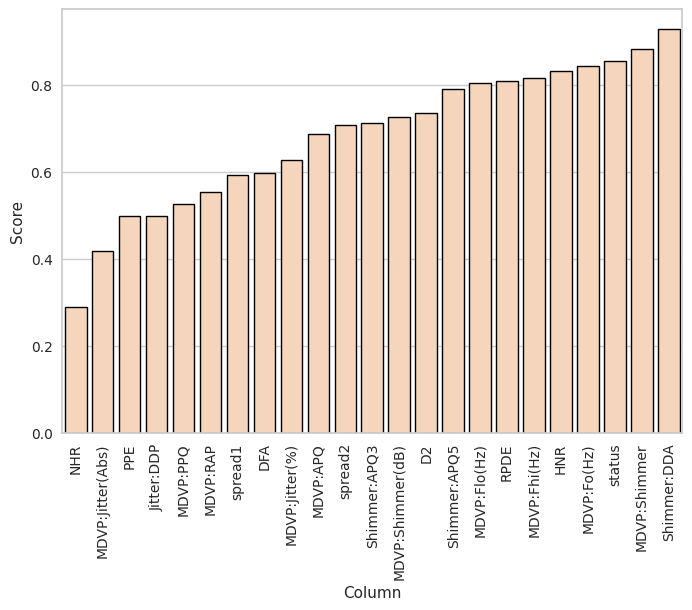

In [ ]:
sns.barplot(Calidad.get_details('Column Shapes').sort_values("Score"), x = "Column", y = "Score", color = "#ffd4b1", edgecolor = "black", linewidth = 1)
plt.xticks(rotation=90);

In [26]:
Calidad.get_details('Column Pair Trends')

,Column 1,Column 2,Metric,Score,Real Correlation,Synthetic Correlation
0,MDVP:Fo(Hz),MDVP:Fhi(Hz),CorrelationSimilarity,0.791672,0.370044,-0.046613
1,MDVP:Fo(Hz),MDVP:Flo(Hz),CorrelationSimilarity,0.650970,0.627532,-0.070528
2,MDVP:Fo(Hz),MDVP:Jitter(%),CorrelationSimilarity,0.870959,-0.139133,0.118949
3,MDVP:Fo(Hz),MDVP:Jitter(Abs),CorrelationSimilarity,0.832501,-0.392679,-0.057681
4,MDVP:Fo(Hz),MDVP:RAP,CorrelationSimilarity,0.930892,-0.091599,0.046617
...,...,...,...,...,...,...
248,spread1,D2,CorrelationSimilarity,0.717018,0.501726,-0.064237
249,spread1,PPE,CorrelationSimilarity,0.505740,0.960343,-0.028178
250,spread2,D2,CorrelationSimilarity,0.807014,0.501548,0.115576
251,spread2,PPE,CorrelationSimilarity,0.690265,0.648405,0.028935


**¿La mayoría de nuestras nuevas columnas tienen una puntuación buena con respecto a la similaridad de las correlaciones de nuestros datos reales y nuestros datos sintéticos?** 

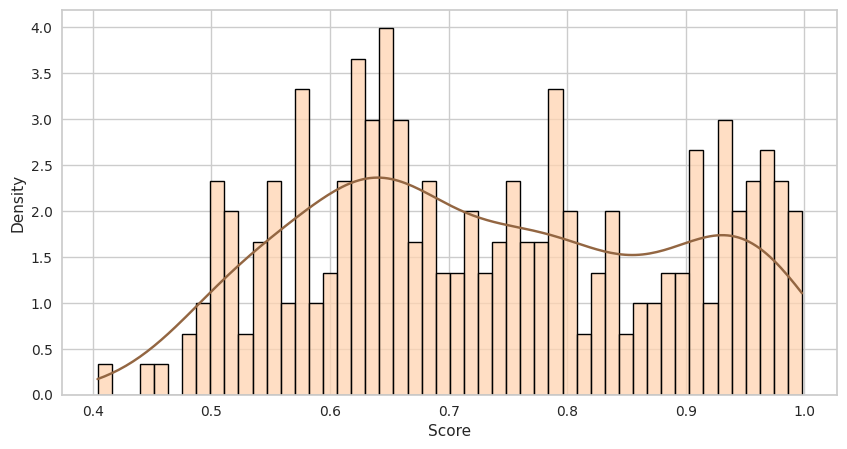

In [ ]:
plt.figure(figsize = (10,5));
ax = sns.histplot(data = Calidad.get_details('Column Pair Trends'), x = "Score", kde = False, bins = 50, color = "#ffd4b1", edgecolor = "black", linewidth = 1, stat = "density")
sns.kdeplot(data=Calidad.get_details('Column Pair Trends'), x="Score", ax=ax, color = "#936642",
            clip = (Calidad.get_details('Column Pair Trends')["Score"].min(), Calidad.get_details('Column Pair Trends')["Score"].max()));

>Podemos observar que hay muchas puntuaciones que son menores de 0.6 y muchas entre 0.6 y 0.8. Muchas columnas no son muy parecidas a las reales.

**Ahora vamos a ver cuanto se parecen algunas gráficas de densidad de los datos sintéticos y los reales (Modificar el índice de la columna a la que se accede par ver cualquier otra).**

In [28]:
get_column_plot(
    real_data=DataPrincipal,
    synthetic_data=DataSintetico,
    column_name=DataPrincipal.columns[10],
    metadata=Metadata
).show("vscode")

>Muchas veces la gráfica de densidad de los datos sintéticos no está completa debido a que no ha generado datos para un dato concreto de números, si aumentáramos las muestras sintéticas a crear esto no pasaría.
>
>Vemos que las gráficas de densidad de los datos sintéticos se pueden acercar a las de los datos reales, pero hay muchos campos en el que las gráficas de densidad no tienen nada que ver.

In [29]:
Synthesizer.get_loss_values_plot().show("vscode")

In [30]:
PosCampoInicial = 1
compare_3d(DataPrincipal.iloc[:,PosCampoInicial:PosCampoInicial+3], DataSintetico.iloc[:,PosCampoInicial:PosCampoInicial+3]).show("vscode")

### Gaussian Copula Synthesizer

##### Ejecutar si:
* En la carpeta data/variables no está el archivo correspondiente a tu sistema operativo.
* Quieres ejecutar el entrenamiento por tu cuenta.

In [35]:
# Synthesizer = GaussianCopulaSynthesizer(Metadata)
# Synthesizer.fit(DataPrincipal)

In [36]:
# if NombreSO == "Windows":
#     Guardar(Synthesizer, "Windows_GaussianCopulaSynthesizer")
# elif NombreSO == "Linux":
#     Guardar(Synthesizer, "Linux_GaussianCopulaSynthesizer")
# elif NombreSO == "Darwin":
#     Guardar(Synthesizer, "MacOS_GaussianCopulaSynthesizer")
# elif NombreSO == "Java":
#     Guardar(Synthesizer, "JVM_GaussianCopulaSynthesizer")
# else:
#     Guardar(Synthesizer, NombreSO + "_" + "GaussianCopulaSynthesizer")

##### Seguir ejecución

In [37]:
if NombreSO == "Windows":
    Synthesizer = Abrir("Windows_GaussianCopulaSynthesizer")
elif NombreSO == "Linux":
    Synthesizer = Abrir("Linux_GaussianCopulaSynthesizer")
elif NombreSO == "Darwin":
    Synthesizer = Abrir("MacOS_GaussianCopulaSynthesizer")
elif NombreSO == "Java":
    Synthesizer = Abrir("JVM_GaussianCopulaSynthesizer")
else:
    Synthesizer = Abrir(NombreSO + "_" + "GaussianCopulaSynthesizer")

In [38]:
DataSintetico = Synthesizer.sample(num_rows=500)
Diagnostico = run_diagnostic(
    real_data=DataPrincipal,
    synthetic_data=DataSintetico,
    metadata=Metadata)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 24/24 [00:00<00:00, 1336.87it/s]|
Data Validity Score: 99.89%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 334.37it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 99.95%



In [39]:
Calidad = evaluate_quality(
    DataPrincipal,
    DataSintetico,
    Metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 1046.30it/s]|
Column Shapes Score: 88.13%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:01<00:00, 145.19it/s]|
Column Pair Trends Score: 95.46%

Overall Score (Average): 91.79%



In [40]:
get_column_plot(
    real_data=DataPrincipal,
    synthetic_data=DataSintetico,
    column_name=DataPrincipal.columns[10],
    metadata=Metadata
).show("vscode")

In [41]:
PosCampoInicial = 1
compare_3d(DataPrincipal.iloc[:,PosCampoInicial:PosCampoInicial+3], DataSintetico.iloc[:,PosCampoInicial:PosCampoInicial+3]).show("vscode")

### TVAE Synthesizer

##### Ejecutar si:
* En la carpeta data/variables no está el archivo correspondiente a tu sistema operativo.
* Quieres ejecutar el entrenamiento por tu cuenta.

In [42]:
# Synthesizer = TVAESynthesizer(Metadata, verbose = True)
# Synthesizer.fit(DataPrincipal)

In [43]:
# if NombreSO == "Windows":
#     Guardar(Synthesizer, "Windows_TVAESynthesizer")
# elif NombreSO == "Linux":
#     Guardar(Synthesizer, "Linux_TVAESynthesizer")
# elif NombreSO == "Darwin":
#     Guardar(Synthesizer, "MacOS_TVAESynthesizer")
# elif NombreSO == "Java":
#     Guardar(Synthesizer, "JVM_TVAESynthesizer")
# else:
#     Guardar(Synthesizer, NombreSO + "_" + "TVAESynthesizer")

##### Seguir ejecución

In [44]:
if NombreSO == "Windows":
    Synthesizer = Abrir("Windows_TVAESynthesizer")
elif NombreSO == "Linux":
    Synthesizer = Abrir("Linux_TVAESynthesizer")
elif NombreSO == "Darwin":
    Synthesizer = Abrir("MacOS_TVAESynthesizer")
elif NombreSO == "Java":
    Synthesizer = Abrir("JVM_TVAESynthesizer")
else:
    Synthesizer = Abrir(NombreSO + "_" + "TVAESynthesizer")

In [45]:
DataSintetico = Synthesizer.sample(num_rows=500)
Diagnostico = run_diagnostic(
    real_data=DataPrincipal,
    synthetic_data=DataSintetico,
    metadata=Metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 24/24 [00:00<00:00, 1504.08it/s]|
Data Validity Score: 99.82%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 334.18it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 99.91%



In [46]:
Calidad = evaluate_quality(
    DataPrincipal,
    DataSintetico,
    Metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 1266.59it/s]|
Column Shapes Score: 82.52%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:01<00:00, 169.36it/s]|
Column Pair Trends Score: 83.1%

Overall Score (Average): 82.81%



In [47]:
get_column_plot(
    real_data=DataPrincipal,
    synthetic_data=DataSintetico,
    column_name=DataPrincipal.columns[10],
    metadata=Metadata
).show("vscode")

In [48]:
PosCampoInicial = 1
compare_3d(DataPrincipal.iloc[:,PosCampoInicial:PosCampoInicial+3], DataSintetico.iloc[:,PosCampoInicial:PosCampoInicial+3]).show("vscode")

### Copula GAN Synthesizer

##### Ejecutar si:
* En la carpeta data/variables no está el archivo correspondiente a tu sistema operativo.
* Quieres ejecutar el entrenamiento por tu cuenta.

In [49]:
# Synthesizer = CopulaGANSynthesizer(Metadata, verbose = True)
# Synthesizer.fit(DataPrincipal)

In [50]:
# if NombreSO == "Windows":
#     Guardar(Synthesizer, "Windows_CopulaGANSynthesizer")
# elif NombreSO == "Linux":
#     Guardar(Synthesizer, "Linux_CopulaGANSynthesizer")
# elif NombreSO == "Darwin":
#     Guardar(Synthesizer, "MacOS_CopulaGANSynthesizer")
# elif NombreSO == "Java":
#     Guardar(Synthesizer, "JVM_CopulaGANSynthesizer")
# else:
#     Guardar(Synthesizer, NombreSO + "_" + "CopulaGANSynthesizer")

##### Seguir ejecución

In [51]:
if NombreSO == "Windows":
    Synthesizer = Abrir("Windows_CopulaGANSynthesizer")
elif NombreSO == "Linux":
    Synthesizer = Abrir("Linux_CopulaGANSynthesizer")
elif NombreSO == "Darwin":
    Synthesizer = Abrir("MacOS_CopulaGANSynthesizer")
elif NombreSO == "Java":
    Synthesizer = Abrir("JVM_CopulaGANSynthesizer")
else:
    Synthesizer = Abrir(NombreSO + "_" + "CopulaGANSynthesizer")

In [52]:
DataSintetico = Synthesizer.sample(num_rows=500)
Diagnostico = run_diagnostic(
    real_data=DataPrincipal,
    synthetic_data=DataSintetico,
    metadata=Metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 24/24 [00:00<00:00, 1336.94it/s]|
Data Validity Score: 99.87%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 334.18it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 99.94%



In [53]:
Calidad = evaluate_quality(
    DataPrincipal,
    DataSintetico,
    Metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 925.54it/s]|
Column Shapes Score: 61.83%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:01<00:00, 159.96it/s]|
Column Pair Trends Score: 73.37%

Overall Score (Average): 67.6%



In [54]:
get_column_plot(
    real_data=DataPrincipal,
    synthetic_data=DataSintetico,
    column_name=DataPrincipal.columns[10],
    metadata=Metadata
).show("vscode")

In [55]:
Synthesizer.get_loss_values_plot().show("vscode")

In [56]:
PosCampoInicial = 1
compare_3d(DataPrincipal.iloc[:,PosCampoInicial:PosCampoInicial+3], DataSintetico.iloc[:,PosCampoInicial:PosCampoInicial+3]).show("vscode")

>Podemos ver que aunque en algunos campos los datos reales y sintéticos mantienen las relaciones entre los otros campos, en otros es completamente distinto y mejorable.

>Hemos visto que el modelo que puede funcionar mejor para nuestros datos es GaussianCopulaSynthesizer así que vamos a ver cuánto puede mejorar.


### MejorModelo

In [57]:
len(DataPrincipal[DataPrincipal["status"] == 1])-len(DataPrincipal[DataPrincipal["status"] == 0])

72

In [58]:
if NombreSO == "Windows":
    Synthesizer = Abrir("Windows_GaussianCopulaSynthesizer")
elif NombreSO == "Linux":
    Synthesizer = Abrir("Linux_GaussianCopulaSynthesizer")
elif NombreSO == "Darwin":
    Synthesizer = Abrir("MacOS_GaussianCopulaSynthesizer")
elif NombreSO == "Java":
    Synthesizer = Abrir("JVM_GaussianCopulaSynthesizer")
else:
    Synthesizer = Abrir(NombreSO + "_" + "GaussianCopulaSynthesizer")

In [59]:
DataSintetico = Synthesizer.sample(num_rows=400)
Diagnostico = run_diagnostic(
    real_data=DataPrincipal,
    synthetic_data=DataSintetico,
    metadata=Metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 24/24 [00:00<00:00, 1415.54it/s]|
Data Validity Score: 99.91%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 200.63it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 99.95%



In [60]:
Calidad = evaluate_quality(
    DataPrincipal,
    DataSintetico,
    Metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 24/24 [00:00<00:00, 1337.01it/s]|
Column Shapes Score: 88.56%

(2/2) Evaluating Column Pair Trends: |██████████| 276/276 [00:02<00:00, 136.39it/s]|
Column Pair Trends Score: 95.51%

Overall Score (Average): 92.03%



In [61]:
get_column_plot(
    real_data=DataPrincipal,
    synthetic_data=DataSintetico,
    column_name=DataPrincipal.columns[10],
    metadata=Metadata
).show("vscode")

In [62]:
PosCampoInicial = 1
compare_3d(DataPrincipal.iloc[:,PosCampoInicial:PosCampoInicial+3], DataSintetico.iloc[:,PosCampoInicial:PosCampoInicial+3]).show("vscode")

## Modificación de los datos principales con los datos sintéticos

In [63]:
len(DataSintetico[DataSintetico["status"] == 0])

117

In [64]:
print("Número de sujetos enfermos restantes para igualar a los sujetos sanos:", len(DataPrincipal[DataPrincipal["status"] == 1])-len(DataPrincipal[DataPrincipal["status"] == 0]))

Número de sujetos enfermos restantes para igualar a los sujetos sanos: 72


Cogemos solo 72 sujetos enfermos

In [65]:
DataDef = pd.concat([DataPrincipal, DataSintetico[DataSintetico["status"] == 0].sample(72)], axis = 0)
DataDef.reset_index(drop = True, inplace = True)

Comparamos si ahora tenemos el mismo número de pacientes con y sin Parkinson

In [66]:
print("Número de pacientes con Parkinson:", DataDef[DataDef["status"] == 1]["status"].count())
print("Número de pacientes sin Parkinson:", DataDef[DataDef["status"] == 0]["status"].count())

Número de pacientes con Parkinson: 120
Número de pacientes sin Parkinson: 120


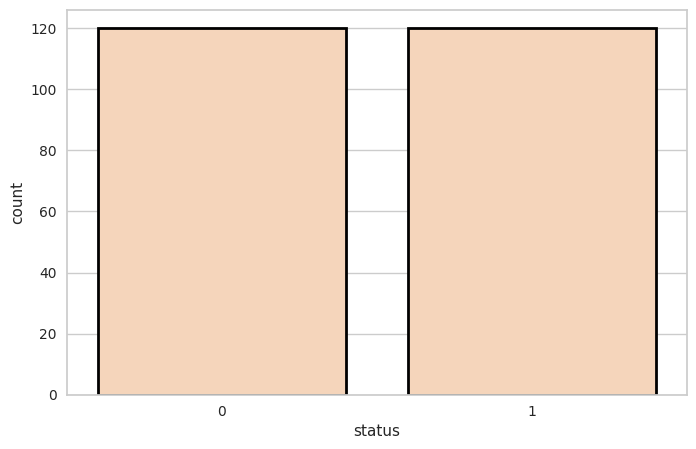

In [67]:
plt.figure(figsize = (8,5))
sns.countplot(data = DataDef, x = "status", color = "#ffd4b1", edgecolor = "black", linewidth = 2);

Ya tenemos nuestros datos de una manera en la que podemos realizar un análisis.

## Análisis de los datos

In [68]:
DataDef = Abrir("DataDefinitiva")

In [69]:
DataDef["name"]

0      phon_R01_S01_1
1      phon_R01_S01_2
2      phon_R01_S01_3
3      phon_R01_S01_4
4      phon_R01_S01_6
            ...      
235     sdv-id-gDhCEs
236     sdv-id-weFQlR
237     sdv-id-LvtOBW
238     sdv-id-hvVors
239     sdv-id-qtPrAK
Name: name, Length: 240, dtype: object

In [70]:
DataDef[["name", "status"]][:50]

,name,status
0,phon_R01_S01_1,1
1,phon_R01_S01_2,1
2,phon_R01_S01_3,1
3,phon_R01_S01_4,1
4,phon_R01_S01_6,1
5,phon_R01_S02_1,1
6,phon_R01_S02_2,1
7,phon_R01_S02_3,1
8,phon_R01_S02_4,1
9,phon_R01_S02_5,1


Parece que el número seguido de la S en el campo "name" representa a un sujeto concreto por lo que siempre va a dar el mismo estado (Este campo lo tendrémos que eliminar más tarde para que el modelo no aprenda según el nombre del sujeto).

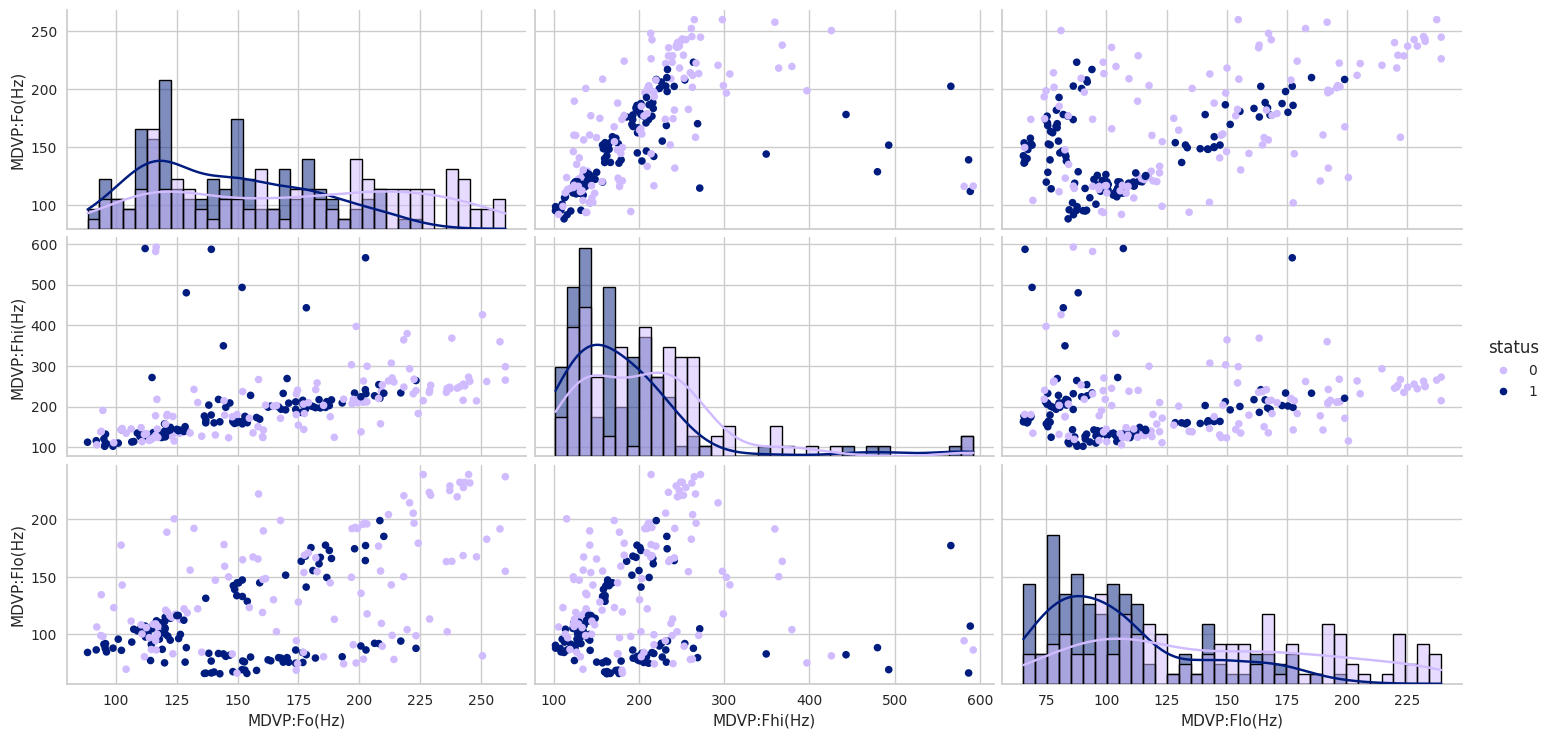

In [71]:
sns.pairplot(data = pd.concat([DataDef.iloc[:,1:4], DataDef["status"]], axis = 1),
                hue = "status",
                diag_kind = "hist",
                diag_kws = {"bins": 35, "kde": True, "linewidth" : 1},
                aspect = 2,
                plot_kws=dict(s=30, edgecolor="white", linewidth = 0),
                palette = [sns.color_palette("pastel")[4], sns.color_palette("dark")[0]]);

Las gráficas de dispersión nos muestran poca relación entre los 3 campos de la frecuencia fundamental de la voz y el estado del sujeto ya que ambas dispersiones son similares. También vemos que tienen cierta relación unos con otros de manera lineal.

Si nos fijamos en el histograma de Flo(Hz) vemos que los sujetos con Parkinson son propensos a tener una frecuencia mínima fundamental de 100Hz pero esta también es la frecuencia mínima fundamental más común de los sujetos sanos aunque el pico de los pacientes con la enfermedad tienen un pico de 200 y el de los pacientes sanos llega alrededor de 140, podemos trabajar algo sobre esta característica para sacar más información. También vemos que los sujetos sin Parkinson pueden tener valores mayores a 200 cuando para los sujetos con Parkinson estos valores no son comunes. Podemos crear un nuevo campo que use a este y a otros que represente una unión de los conjuntos para que pueda dar una mayor información ya que no tiene una relación muy fuerte con el estado del sujeto de manera aislada.

Si nos fijamos en el histograma de Fhi(hz) vemos que tiene nula relación con el estado ya que ambas tienen frecuencias similares en valores parecidos.

Pero si miramos el histograma de Fo(Hz) observamos que tienen los máximos en diferentes rangos de valores y tienen sus máximos en diferentes zonas por lo que hay una diferencia clara en la frecuencia fundamental media vocal de los pacientes con Parkinson y sin él por lo que trabajaremos sobre este campo más adelante para poder obtener la mayor información posible de esta relación.

+ Relación entre los campos: Todos con todos(lineal).
+ Relación con la variable objetivo: MDVP:Flo(Hz) / MDVP:Fo(Hz)
  - Relación MDVP:Flo(Hz)-objetivo:
    * Máximo más alto en sujetos enfermos.
    * Los sujetos sanos llegan a valores más altos.
  - Relación MDVP:Fo(Hz)-objetivo:
    * 1 máximo en común y 2 diferentes entre sujetos sanos y enfermos.
    * Los sujetos sanos llegan a valores más altos.

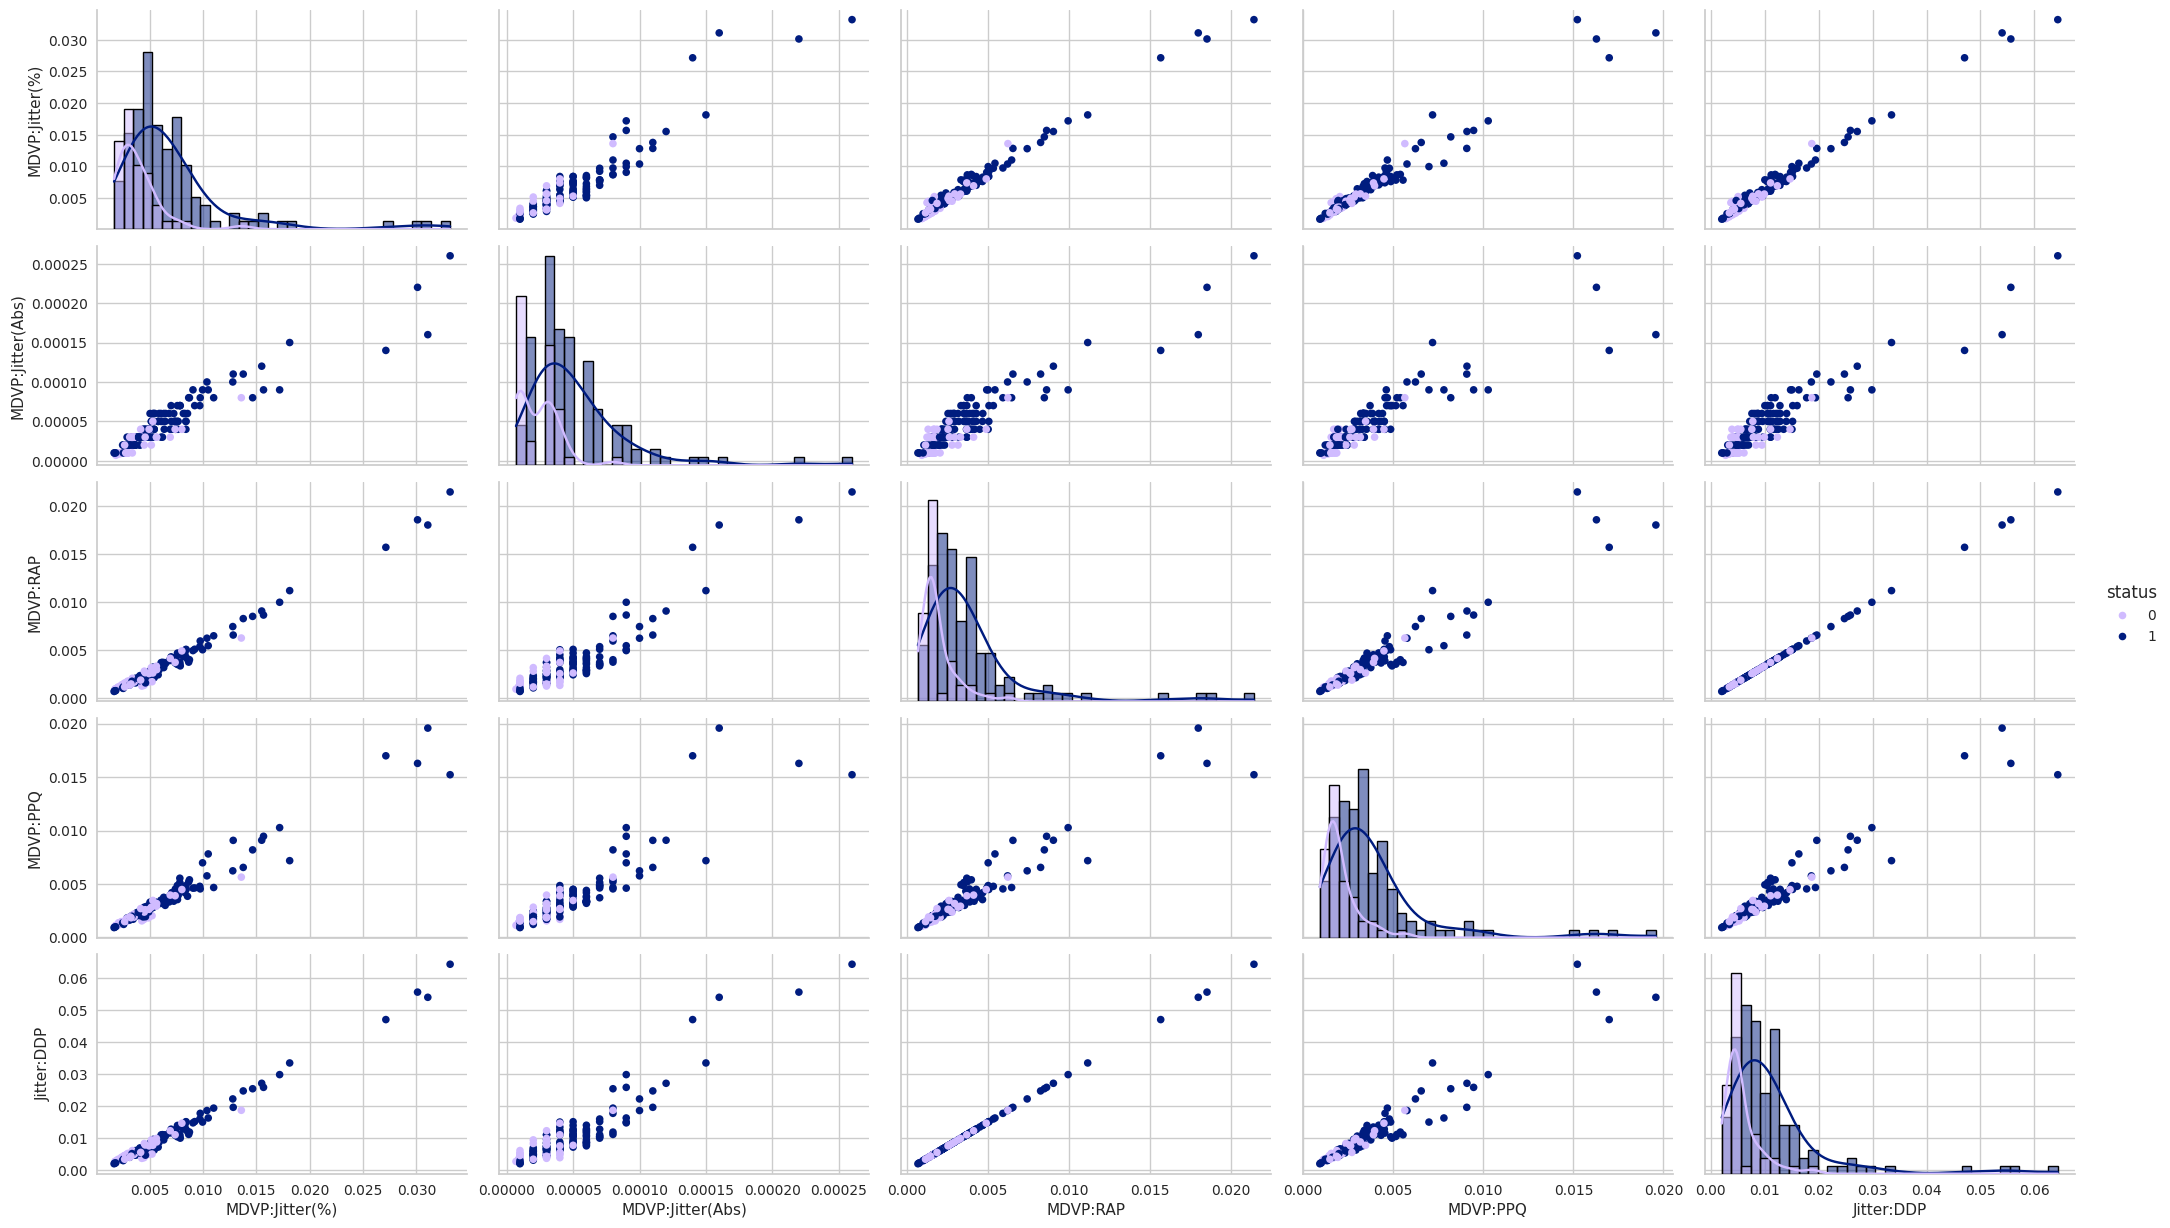

In [72]:
sns.pairplot(data = pd.concat([DataPrincipal.iloc[:,4:9], DataPrincipal["status"]], axis = 1),
                hue = "status",
                diag_kind = "hist",
                diag_kws = {"bins": 35, "kde": True, "linewidth" : 1},
                aspect = 1.7,
                plot_kws=dict(s=30, edgecolor="white", linewidth = 0),
                palette = [sns.color_palette("pastel")[4], sns.color_palette("dark")[0]]);

Podemos observar que los sujetos con parkinson tienden a llegar a valores más altos pero esto seguramente sea debido a que al tener inicialmente pocos datos de sujetos sanos tenían un menor rango de valores que los sujetos enfermos y como al crear los datos sintéticos se intenta mantener el rango que tienen los valores iniciales siguen sin alcanzar los valores a los que llegan los sujetos enfermos, igualmente tendremos en cuenta esta diferencia de valores para que el modelo entrene por si encuentra algúna relación ya que al modelo no le afecta que un campo nuevo no tenga mucha importancia, en cambio, si tiene importancia hará que su precisión aumente. También vemos que las gráficas de densidad ahora no nos muestran diferencias notables en cuando a la altura de los picos ni diferencias en cuanto al valor donde se situan los 2 picos aunque los picos de los sujetos enfermos parecen ser más amplios que la de los sujetos sanos que son muy pronunciados.

También hay bastante relación entre todos los campos.

+ Relación entre los campos: Todos con todos(lineal).
+ Relación con la variable objetivo: MDVP:Jitter(%) / MDVP:Jitter(Abs) / MDVP:RAP / MDVP:PPQ / Jitter:DDP
  - Relación MDVP:Jitter(%)-objetivo:
    * Los sujetos enfermos llegan a valores más altos.
    * Máximo más amplio en sujetos enfermos.
  - Relación MDVP:Jitter(Abs)-objetivo:
    * Los sujetos enfermos llegan a valores más altos.
    * Máximo más amplio en sujetos enfermos.
  - Relación MDVP:RAP-objetivo:
    * Los sujetos enfermos llegan a valores más altos.
    * Máximo más amplio en sujetos enfermos.
  - Relación MDVP:PPQ-objetivo:
    * Los sujetos enfermos llegan a valores más altos.
    * Máximo más amplio en sujetos enfermos.
  - Relación Jitter:DDP-objetivo:
    * Los sujetos enfermos llegan a valores más altos.
    * Máximo más amplio en sujetos enfermos.

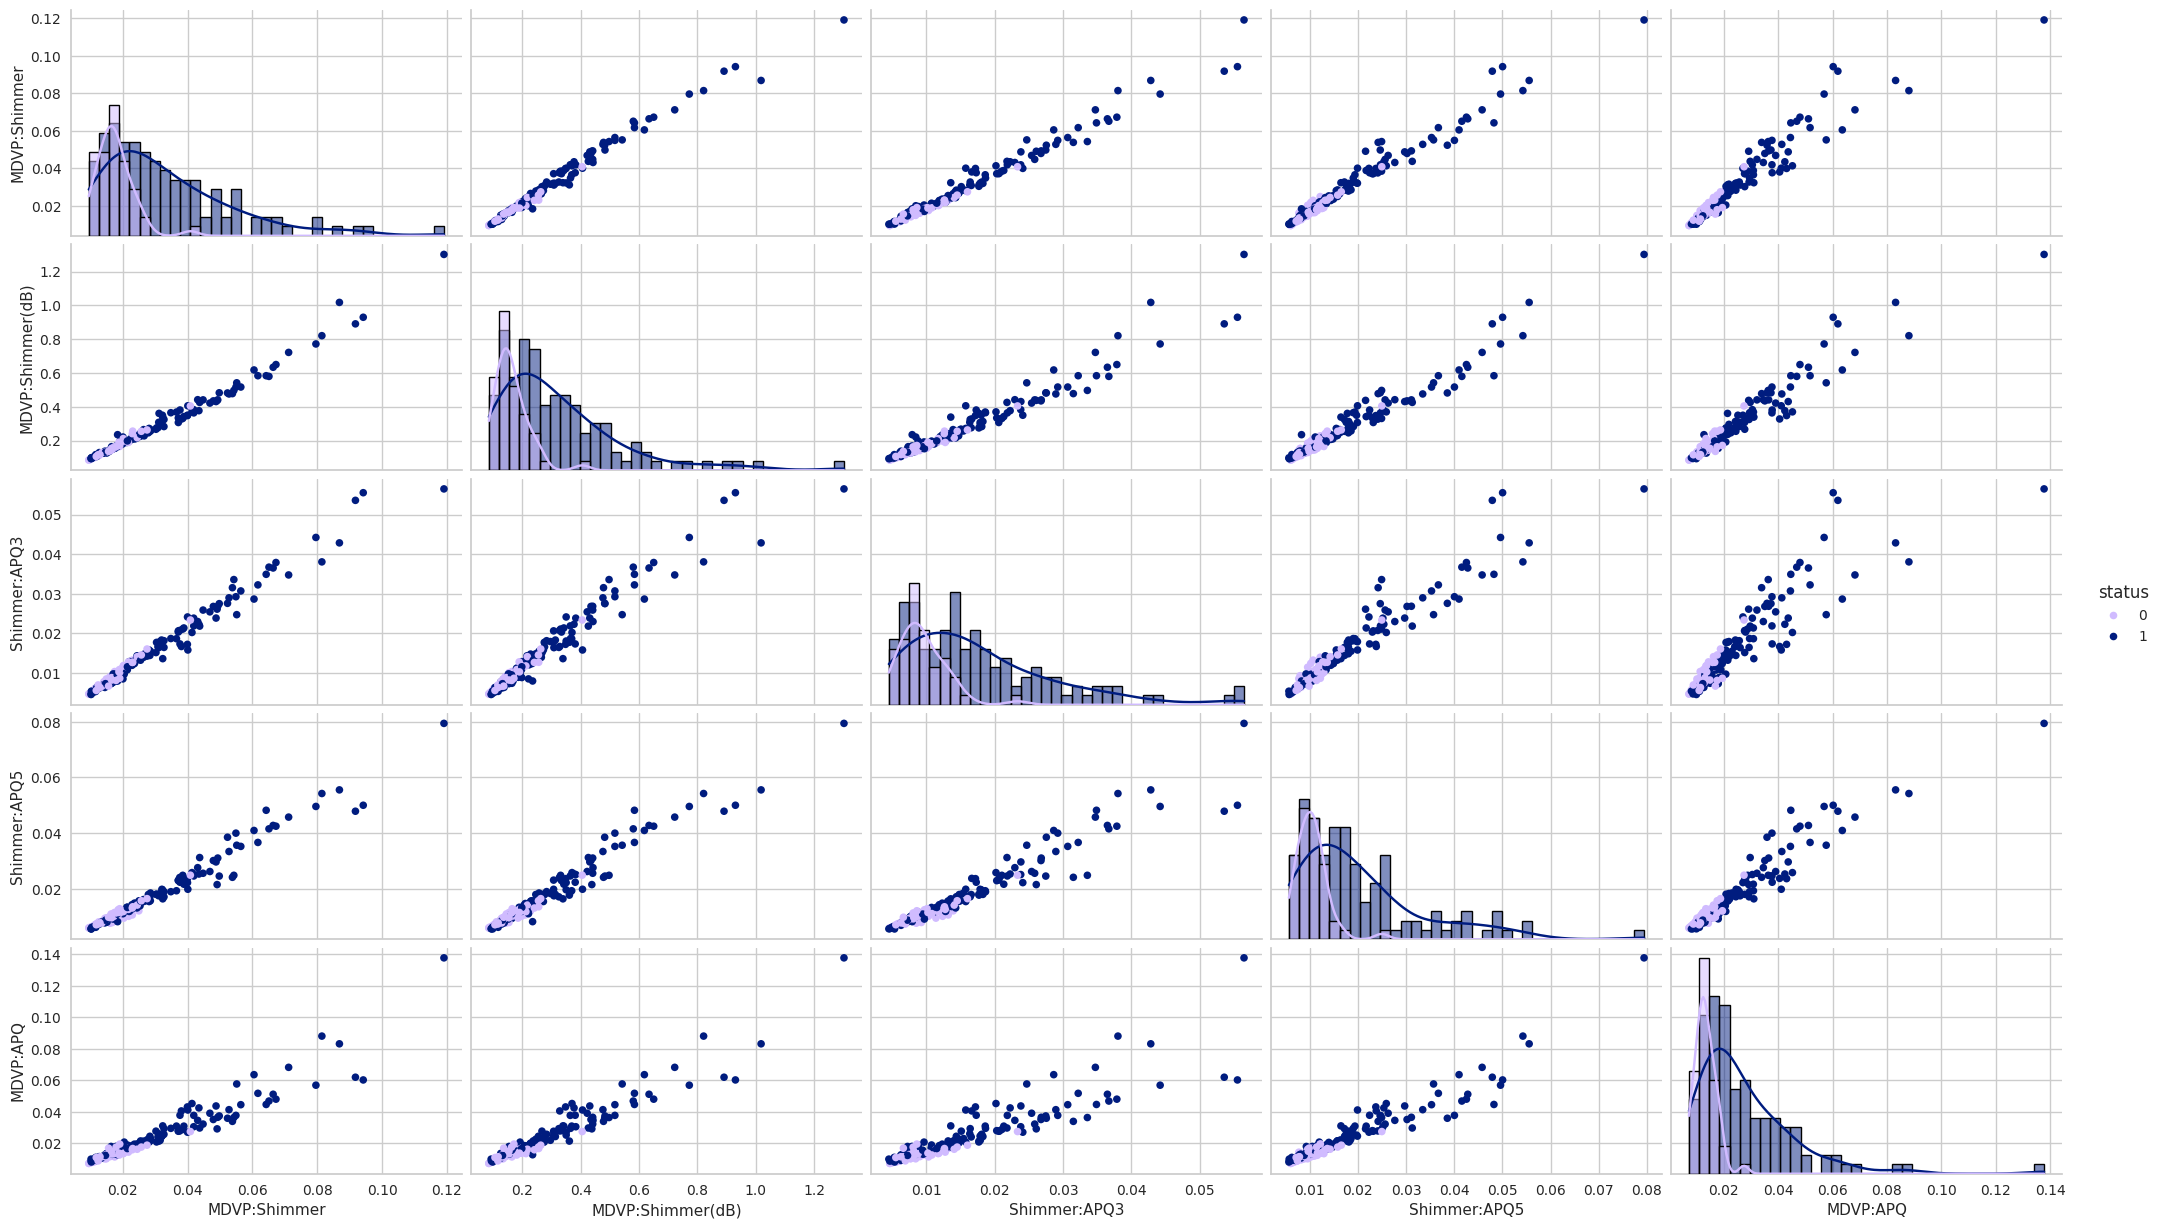

In [73]:
sns.pairplot(data = pd.concat([DataPrincipal.iloc[:,9:14], DataPrincipal["status"]], axis = 1),
                hue = "status",
                diag_kind = "hist",
                diag_kws = {"bins": 35, "kde": True, "linewidth" : 1},
                aspect = 1.7,
                plot_kws=dict(s=30, edgecolor="white", linewidth = 0),
                palette = [sns.color_palette("pastel")[4], sns.color_palette("dark")[0]]);

Observamos que tienen las mismas características que los campos de las gráficas anteriores pero en el caso de los histogramas, los valores atípicos están más diferenciados entre los sujetos sanos y enfermos.

+ Relación entre los campos: Todos con todos(lineal).
+ Relación con la variable objetivo: MDVP:Shimmer / MDVP:Shimmer(dB) / Shimmer:APQ3 / Shimmer:APQ5 / MDVP:APQ
  - Relación MDVP:Shimmer-objetivo:
    * Los sujetos enfermos llegan a valores más altos.
    * Máximo más amplio en sujetos enfermos.
  - Relación MDVP:Shimmer(dB)-objetivo:
    * Los sujetos enfermos llegan a valores más altos.
    * Máximo más amplio en sujetos enfermos.
  - Relación Shimmer:APQ3-objetivo:
    * Los sujetos enfermos llegan a valores más altos.
    * Máximo más amplio en sujetos enfermos.
  - Relación Shimmer:APQ5-objetivo:
    * Los sujetos enfermos llegan a valores más altos.
    * Máximo más amplio en sujetos enfermos.
  - Relación MDVP:APQ:-objetivo:
    * Los sujetos enfermos llegan a valores más altos.
    * Máximo más amplio en sujetos enfermos.

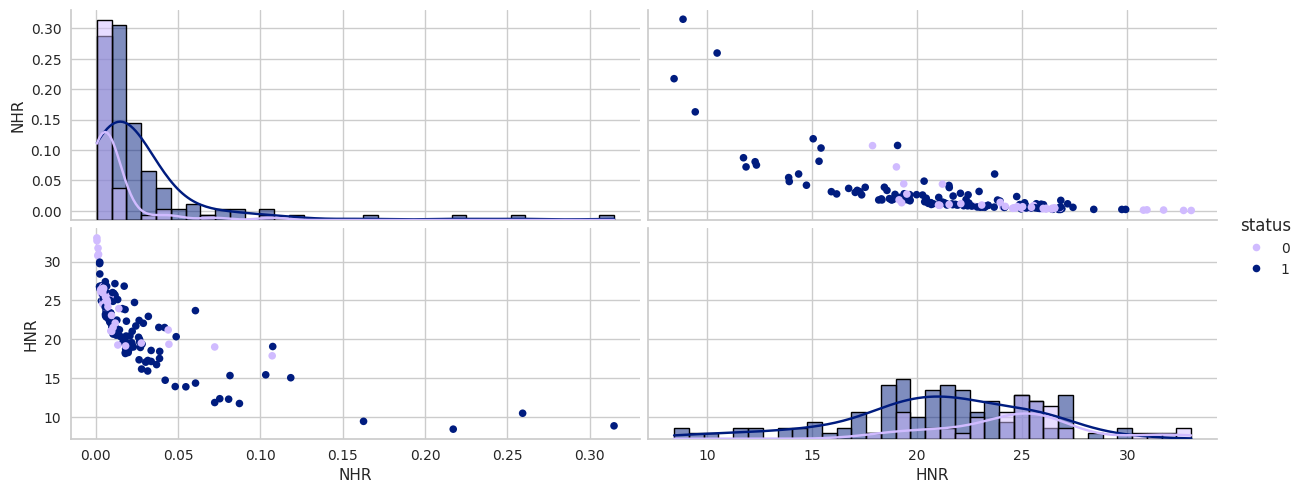

In [74]:
sns.pairplot(data = pd.concat([DataPrincipal[["NHR", "HNR"]], DataPrincipal["status"]], axis = 1),
                hue = "status",
                diag_kind = "hist",
                diag_kws = {"bins": 35, "kde": True, "linewidth" : 1},
                aspect = 2.5,
                plot_kws=dict(s=30, edgecolor="white", linewidth = 0),
                palette = [sns.color_palette("pastel")[4], sns.color_palette("dark")[0]]);

El campo NHR no nos da tanta información. Los histogramas son parecidos a los anteriores pero con diferente forma de pico. Pero el campo HNR sí nos puede servir para identificar características poco comunes. Vemos que hay una relación proporcionalmente inversa entre HNR y NHR y vemos que en el campo HNR los sujetos sanos alcanzan valores más bajos.

+ Relación entre los campos: Todos con todos(inversamente proporcional).
+ Relación con la variable objetivo: NHR / HNR
  - Relación NHR-objetivo:
    * Los sujetos enfermos llegan a valores más altos.
    * Máximo más amplio en sujetos enfermos.
  - Relación HNR-objetivo:
    * Los sujetos enfermos llegan a valores más bajos.
    * Máximo más amplio en sujetos enfermos.

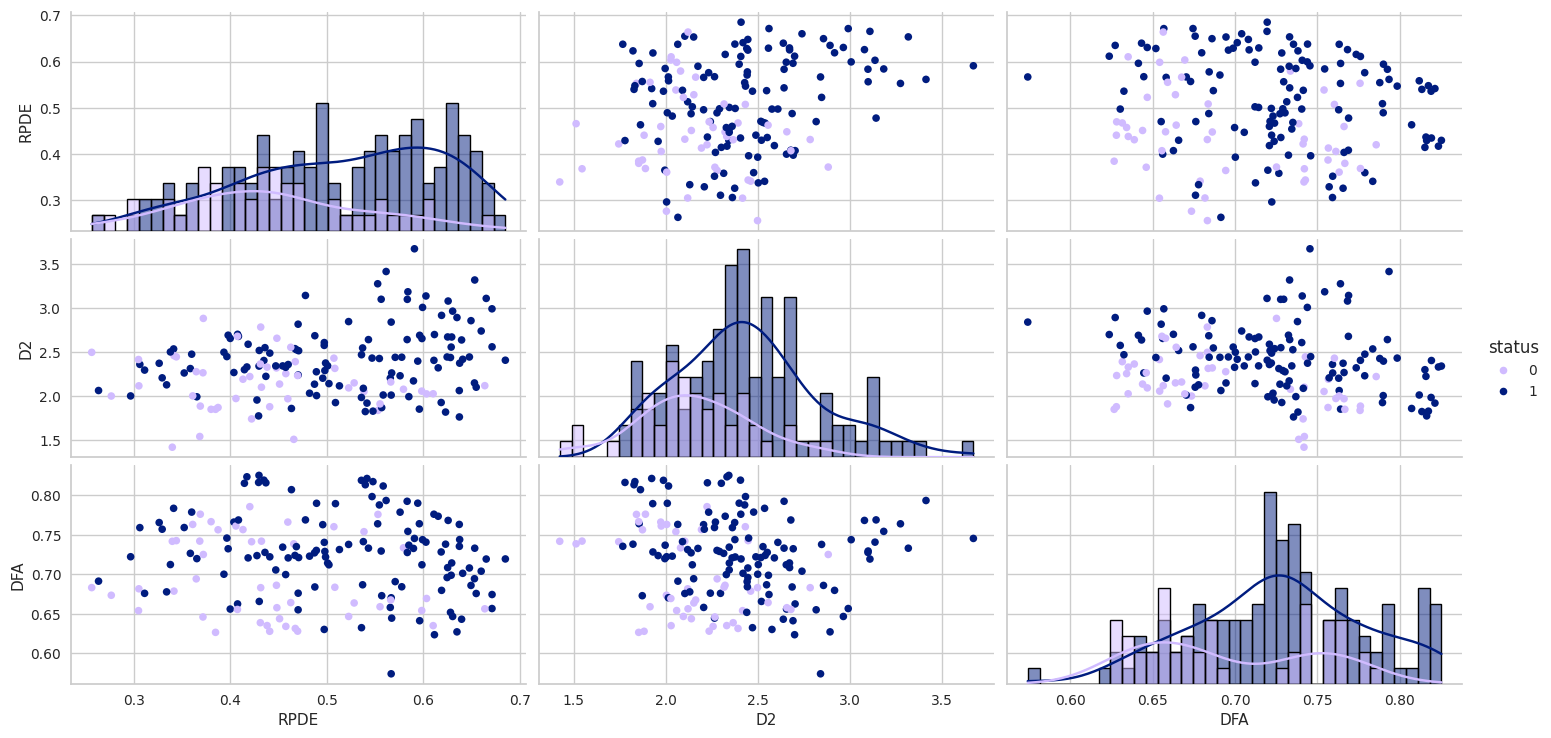

In [75]:
sns.pairplot(data = pd.concat([DataPrincipal[["RPDE", "D2", "DFA"]], DataPrincipal["status"]], axis = 1),
                hue = "status",
                diag_kind = "hist",
                diag_kws = {"bins": 35, "kde": True, "linewidth" : 1},
                aspect = 2,
                plot_kws=dict(s=30, edgecolor="white", linewidth = 0),
                palette = [sns.color_palette("pastel")[4], sns.color_palette("dark")[0]]);

El campo RPDE nos puede servir para obtener características comunes de la enfermedad pero no para características no comunes. En cambio los campos D2 y DFA nos puede servir para ambas cosas. Observamos también que no tienen prácticamente ninguna relación ningún campo con el otro.

Si nos fijamos en las gráficas de dispersión que relacionan D2 y RPDE podemos ver que son las únicas que tienen un area en la que hay muchos sujetos con Parkinson y muy pocos sin él, aunque la mayoría del resto de sujetos está muy mezclado, esto nos puede servir para predecir características no comunes de la enfermedad. No podemos decir que estos campos por separado tienen valores diferenciadores entre sujetos sanos y enfermos sino que funcionan como pareja. Estos campos individualmente no nos ayudan a der bien aread diferentes entre sujetos sanos y enfermos como podemos ver en las otras gráficas en las que se relacionan estos campos con DFA.

+ Relación entre los campos: Ninguna.
+ Relación con la variable objetivo: RPDE / DFA / D2
  - Relación RPDE-objetivo:
    * 1 máximo en común y 1 de sujetos enfermos diferente.
  - Relación D2-objetivo:
    * Diferentes máximos.
    * Los sujetos enfermos llegan a valores más altos.
  - Relación DFA-objetivo:
    * Diferentes máximos.
    * Los sujetos enfermos llegan a valores más altos y bajos.
  - Relación (RPDE-D2)-objetivo:
    * Zona identificativa de pacientes enfermos.

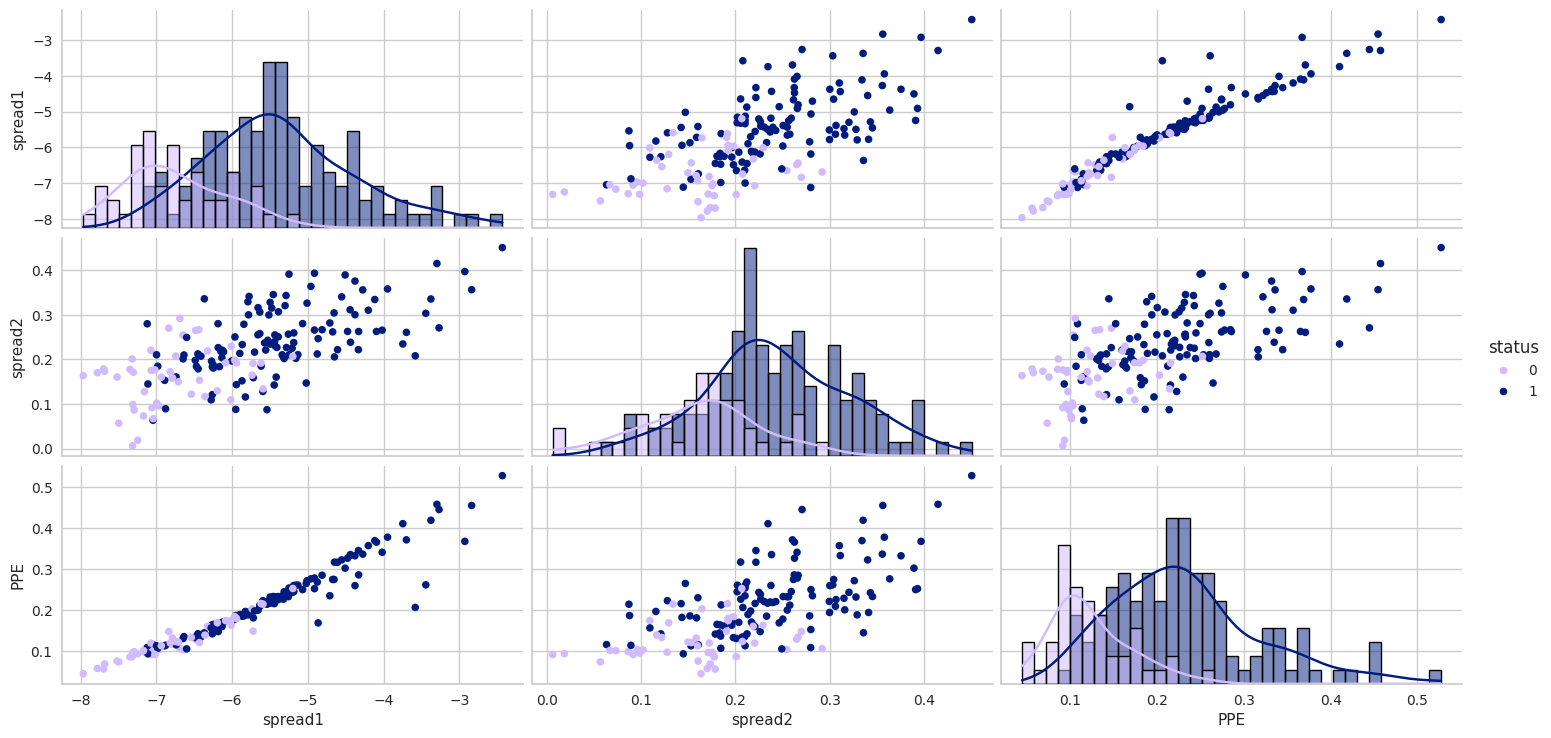

In [76]:
sns.pairplot(data = pd.concat([DataPrincipal[["spread1","spread2","PPE"]], DataPrincipal["status"]], axis = 1),
                hue = "status",
                diag_kind = "hist",
                diag_kws = {"bins": 35, "kde": True, "linewidth" : 1},
                aspect = 2,
                plot_kws=dict(s=30, edgecolor="white", linewidth = 0),
                palette = [sns.color_palette("pastel")[4], sns.color_palette("dark")[0]])

En este caso los campos spread1, spread2 y PPE tienen diferencias en los histogramas en cuanto a los picos entre los pacientes con Parkinson y los que no. Además, podemos ver que están bastante relacionados entre ellos, sobretodo PPE con spread1. Y por último vemos que los pacientes sanos alcanzan valores más bajos que los enfermos pero los enfermos alcanzan valores más altos.

+ Relación entre los campos: Todos con todos(lineal).
+ Relación con la variable objetivo: spread1 / spread2 / PPE
  - Relación spread1-objetivo:
    * Máximos diferentes.
    * Los sujetos enfermos llegan a valores más altos.
    * Los sujetos sanos llegan a valores más bajos
  - Relación spread2-objetivo:
    * Máximos diferentes.
    * Los sujetos enfermos llegan a valores más altos.
    * Los sujetos sanos llegan a valores más bajos
  - Relación PPE-objetivo:
    * Máximos diferentes.
    * Los sujetos enfermos llegan a valores más altos.
    * Los sujetos sanos llegan a valores más bajos

Vemos que todos los campos excepto MDVP:Fhi(Hz)nos pueden dar información importante así que vamos a usarlos todos. Vamos a seguir haciendo análisis sobre los campos

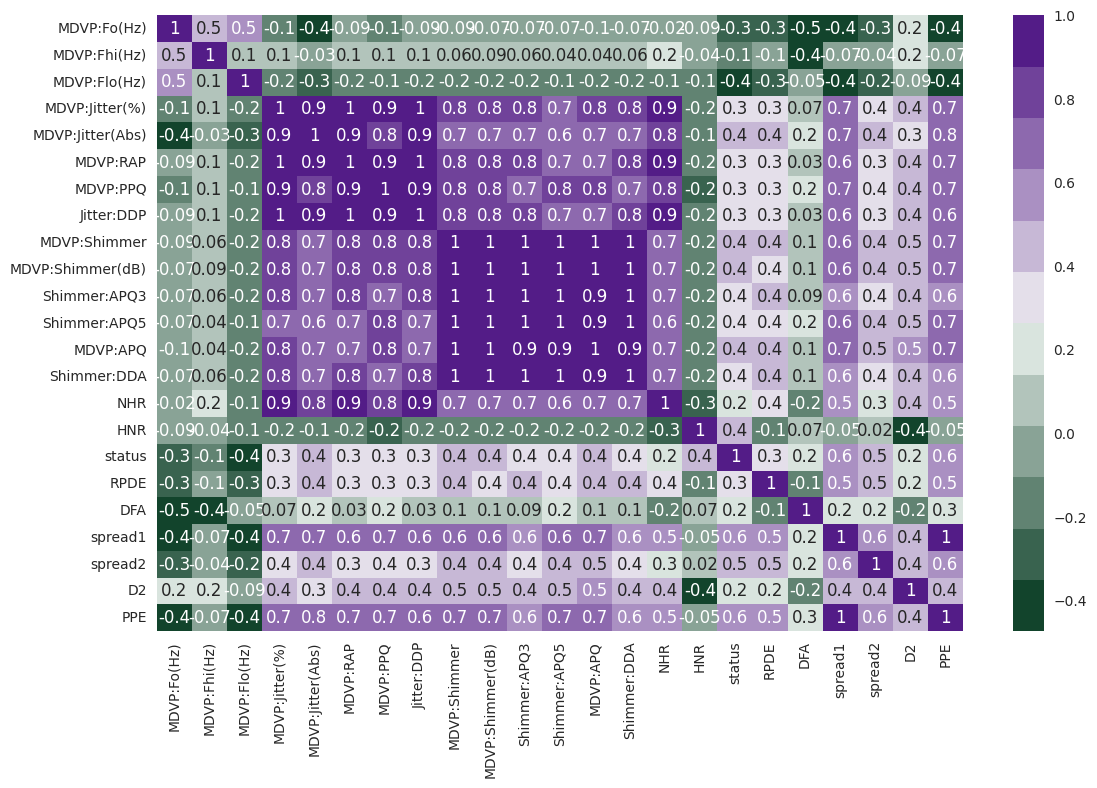

In [77]:
plt.figure(figsize = (13,8))
sns.heatmap(DataDef.iloc[:, 1:].corr(), annot = True, fmt = ".1g", cmap=sns.diverging_palette(145, 280, s=85, l=25, n=12));

No hay muchos campos que tengan una relación demasiado fuerte con la variable objetivo. Los campos que más relación tienen son spread1 y PPE pero vemos sobretodo por el centro campos que tienen mucha relación entre ellos.

## Prueba de algoritmos

Pycaret elimina las columnas de texto automáticamente.

In [79]:
DataDef = DataDef.drop(columns = ["name"])

In [80]:
Test, Train = train_test_split(DataDef, test_size=0.8, shuffle=True, random_state = 12)

In [81]:
Train

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
63,136.969,166.607,66.004,0.00923,0.00007,0.00507,0.00463,0.01520,0.03111,0.308,0.01638,0.01759,0.02603,0.04914,0.02659,19.979,1,0.498133,0.729067,-5.324574,0.205660,2.291558,0.226247
86,125.036,143.946,116.187,0.01280,0.00010,0.00743,0.00623,0.02228,0.03886,0.342,0.02135,0.02174,0.03088,0.06406,0.08151,15.338,1,0.629574,0.714485,-4.020042,0.265315,2.671825,0.340623
111,120.289,128.143,100.209,0.00492,0.00004,0.00269,0.00238,0.00808,0.01412,0.125,0.00703,0.00820,0.01194,0.02110,0.01610,23.949,1,0.467160,0.724045,-6.135296,0.203630,2.539724,0.169923
87,125.791,140.557,96.206,0.01378,0.00011,0.00826,0.00655,0.02478,0.04689,0.422,0.02542,0.02630,0.03908,0.07625,0.10323,15.433,1,0.571010,0.690892,-5.159169,0.202146,2.441612,0.260375
235,120.434,156.811,120.937,0.01034,0.00007,0.00658,0.00579,0.01992,0.03486,0.322,0.01567,0.02149,0.02831,0.04747,0.04997,8.613,0,0.678648,0.736347,-6.018573,0.272259,2.462930,0.182440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,122.188,128.611,115.765,0.00524,0.00004,0.00169,0.00203,0.00507,0.01613,0.143,0.00855,0.00776,0.01433,0.02566,0.00839,23.162,0,0.579597,0.733659,-6.439398,0.266392,2.079922,0.133867
65,142.729,162.408,65.476,0.00831,0.00006,0.00469,0.00419,0.01407,0.03485,0.365,0.01868,0.01906,0.02949,0.05605,0.02599,20.264,1,0.489345,0.730387,-5.720868,0.158830,2.277927,0.180828
4,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,0.456,0.02328,0.03526,0.03243,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
56,209.144,237.494,109.379,0.00282,0.00001,0.00147,0.00152,0.00442,0.01861,0.170,0.00975,0.01258,0.01382,0.02925,0.00871,25.554,0,0.341788,0.678874,-7.040508,0.066994,2.460791,0.101516


In [82]:
s = setup(Train, target = 'status', session_id = 114)

,Description,Value
0,Session id,114
1,Target,status
2,Target type,Binary
3,Original data shape,"(192, 23)"
4,Transformed data shape,"(192, 23)"
5,Transformed train set shape,"(134, 23)"
6,Transformed test set shape,"(58, 23)"
7,Numeric features,22
8,Preprocess,True
9,Imputation type,simple


In [83]:
Train

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
63,136.969,166.607,66.004,0.00923,0.00007,0.00507,0.00463,0.01520,0.03111,0.308,0.01638,0.01759,0.02603,0.04914,0.02659,19.979,1,0.498133,0.729067,-5.324574,0.205660,2.291558,0.226247
86,125.036,143.946,116.187,0.01280,0.00010,0.00743,0.00623,0.02228,0.03886,0.342,0.02135,0.02174,0.03088,0.06406,0.08151,15.338,1,0.629574,0.714485,-4.020042,0.265315,2.671825,0.340623
111,120.289,128.143,100.209,0.00492,0.00004,0.00269,0.00238,0.00808,0.01412,0.125,0.00703,0.00820,0.01194,0.02110,0.01610,23.949,1,0.467160,0.724045,-6.135296,0.203630,2.539724,0.169923
87,125.791,140.557,96.206,0.01378,0.00011,0.00826,0.00655,0.02478,0.04689,0.422,0.02542,0.02630,0.03908,0.07625,0.10323,15.433,1,0.571010,0.690892,-5.159169,0.202146,2.441612,0.260375
235,120.434,156.811,120.937,0.01034,0.00007,0.00658,0.00579,0.01992,0.03486,0.322,0.01567,0.02149,0.02831,0.04747,0.04997,8.613,0,0.678648,0.736347,-6.018573,0.272259,2.462930,0.182440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,122.188,128.611,115.765,0.00524,0.00004,0.00169,0.00203,0.00507,0.01613,0.143,0.00855,0.00776,0.01433,0.02566,0.00839,23.162,0,0.579597,0.733659,-6.439398,0.266392,2.079922,0.133867
65,142.729,162.408,65.476,0.00831,0.00006,0.00469,0.00419,0.01407,0.03485,0.365,0.01868,0.01906,0.02949,0.05605,0.02599,20.264,1,0.489345,0.730387,-5.720868,0.158830,2.277927,0.180828
4,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,0.456,0.02328,0.03526,0.03243,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
56,209.144,237.494,109.379,0.00282,0.00001,0.00147,0.00152,0.00442,0.01861,0.170,0.00975,0.01258,0.01382,0.02925,0.00871,25.554,0,0.341788,0.678874,-7.040508,0.066994,2.460791,0.101516


In [84]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [85]:
MejorModelo = compare_models(n_select=6)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9104,0.9685,0.9048,0.9185,0.9038,0.8193,0.8315,0.0700
lda,Linear Discriminant Analysis,0.9033,0.9466,0.9381,0.8788,0.9031,0.8072,0.8172,0.0150
qda,Quadratic Discriminant Analysis,0.8962,0.9531,0.8929,0.8964,0.8915,0.7918,0.7973,0.0220
ada,Ada Boost Classifier,0.8962,0.9650,0.9095,0.8986,0.8985,0.7926,0.8034,0.0510
lightgbm,Light Gradient Boosting Machine,0.8951,0.9633,0.8905,0.9000,0.8904,0.7891,0.7978,0.0410
rf,Random Forest Classifier,0.8725,0.9626,0.8452,0.8919,0.8657,0.7442,0.7486,0.0830
gbc,Gradient Boosting Classifier,0.8725,0.9398,0.8762,0.8861,0.8727,0.7457,0.7605,0.0810
lr,Logistic Regression,0.8670,0.9306,0.9095,0.8429,0.8717,0.7355,0.7439,0.3750
ridge,Ridge Classifier,0.8659,0.9245,0.9548,0.8273,0.8789,0.7352,0.7583,0.0180
dt,Decision Tree Classifier,0.8648,0.8655,0.8595,0.8765,0.8613,0.7293,0.7418,0.0150


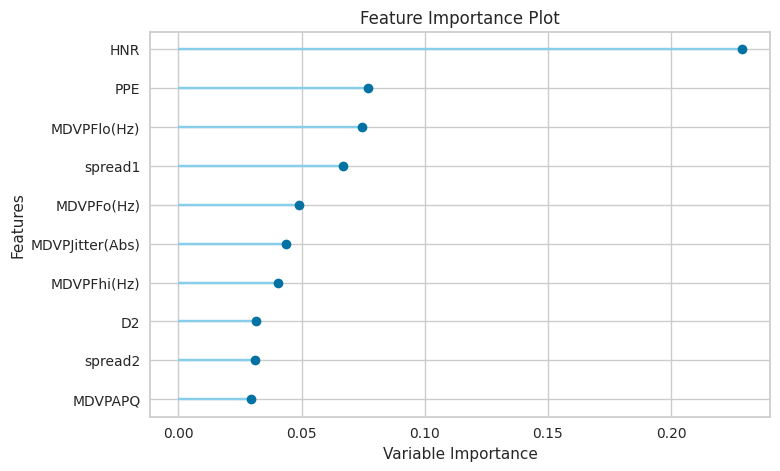

In [86]:
plot_model(MejorModelo[0], "feature")

In [87]:
predict_model(MejorModelo[0], Test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9375,0.9843,1.0000,0.8929,0.9434,0.8741,0.8811


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status,prediction_label,prediction_score
79,178.222000,202.449997,141.046997,0.00321,0.000020,0.00163,0.00194,0.00488,0.03759,0.327,...,15.924000,0.598714,0.712199,-6.366916,0.335753,2.654271,0.144614,1,1,0.64
194,160.259995,125.930000,118.917999,0.00312,0.000021,0.00144,0.00175,0.00440,0.01941,0.183,...,8.613000,0.312191,0.770827,-6.240790,0.156927,2.316617,0.160844,0,0,0.87
187,235.858002,234.895996,163.287003,0.00201,0.000008,0.00075,0.00130,0.00226,0.01166,0.106,...,8.613000,0.424642,0.632716,-7.022206,0.168219,2.481259,0.084759,0,0,0.95
27,199.227997,209.511993,192.091003,0.00241,0.000010,0.00134,0.00138,0.00402,0.01015,0.089,...,30.940001,0.432439,0.742055,-7.682587,0.173319,2.103106,0.068501,0,0,0.87
110,120.078003,126.632004,105.667000,0.00270,0.000020,0.00116,0.00135,0.00349,0.01022,0.090,...,26.368999,0.491345,0.718839,-5.892061,0.195976,2.108873,0.183572,1,1,0.57
160,116.342003,581.289001,94.246002,0.00267,0.000020,0.00115,0.00148,0.00345,0.01300,0.117,...,25.023001,0.528485,0.663884,-6.359018,0.116636,2.152083,0.138868,0,1,0.65
209,189.789993,124.246002,112.950996,0.00410,0.000030,0.00239,0.00548,0.00725,0.01560,0.137,...,8.613000,0.436886,0.715585,-5.987067,0.136580,2.416352,0.172519,0,0,0.89
173,110.355003,148.072006,108.169998,0.00313,0.000025,0.00160,0.00217,0.00487,0.01084,0.097,...,8.613000,0.640776,0.724964,-6.967757,0.121636,2.107328,0.107737,0,0,0.86
73,96.106003,108.664001,84.510002,0.00694,0.000070,0.00389,0.00415,0.01168,0.04024,0.364,...,19.055000,0.544805,0.770466,-4.441519,0.155097,2.645959,0.327978,1,1,0.92
109,119.030998,127.532997,109.216003,0.00440,0.000040,0.00214,0.00192,0.00641,0.01033,0.098,...,26.841999,0.457541,0.699787,-6.890021,0.152941,2.328513,0.112856,1,1,0.54


In [88]:
ModeloFinal = tune_model(MejorModelo[0])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9286,1.0000,1.0000,0.8750,0.9333,0.8571,0.8660
1,0.9286,0.9388,1.0000,0.8750,0.9333,0.8571,0.8660
2,0.7143,0.8776,0.8571,0.6667,0.7500,0.4286,0.4472
3,0.8571,0.9388,0.8571,0.8571,0.8571,0.7143,0.7143
4,0.9231,0.9524,1.0000,0.8571,0.9231,0.8471,0.8571
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.7692,0.9048,0.8333,0.7143,0.7692,0.5412,0.5476
7,0.9231,0.9524,1.0000,0.8571,0.9231,0.8471,0.8571
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [89]:
predict_model(ModeloFinal, Test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9375,0.9843,1.0000,0.8929,0.9434,0.8741,0.8811


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status,prediction_label,prediction_score
79,178.222000,202.449997,141.046997,0.00321,0.000020,0.00163,0.00194,0.00488,0.03759,0.327,...,15.924000,0.598714,0.712199,-6.366916,0.335753,2.654271,0.144614,1,1,0.64
194,160.259995,125.930000,118.917999,0.00312,0.000021,0.00144,0.00175,0.00440,0.01941,0.183,...,8.613000,0.312191,0.770827,-6.240790,0.156927,2.316617,0.160844,0,0,0.87
187,235.858002,234.895996,163.287003,0.00201,0.000008,0.00075,0.00130,0.00226,0.01166,0.106,...,8.613000,0.424642,0.632716,-7.022206,0.168219,2.481259,0.084759,0,0,0.95
27,199.227997,209.511993,192.091003,0.00241,0.000010,0.00134,0.00138,0.00402,0.01015,0.089,...,30.940001,0.432439,0.742055,-7.682587,0.173319,2.103106,0.068501,0,0,0.87
110,120.078003,126.632004,105.667000,0.00270,0.000020,0.00116,0.00135,0.00349,0.01022,0.090,...,26.368999,0.491345,0.718839,-5.892061,0.195976,2.108873,0.183572,1,1,0.57
160,116.342003,581.289001,94.246002,0.00267,0.000020,0.00115,0.00148,0.00345,0.01300,0.117,...,25.023001,0.528485,0.663884,-6.359018,0.116636,2.152083,0.138868,0,1,0.65
209,189.789993,124.246002,112.950996,0.00410,0.000030,0.00239,0.00548,0.00725,0.01560,0.137,...,8.613000,0.436886,0.715585,-5.987067,0.136580,2.416352,0.172519,0,0,0.89
173,110.355003,148.072006,108.169998,0.00313,0.000025,0.00160,0.00217,0.00487,0.01084,0.097,...,8.613000,0.640776,0.724964,-6.967757,0.121636,2.107328,0.107737,0,0,0.86
73,96.106003,108.664001,84.510002,0.00694,0.000070,0.00389,0.00415,0.01168,0.04024,0.364,...,19.055000,0.544805,0.770466,-4.441519,0.155097,2.645959,0.327978,1,1,0.92
109,119.030998,127.532997,109.216003,0.00440,0.000040,0.00214,0.00192,0.00641,0.01033,0.098,...,26.841999,0.457541,0.699787,-6.890021,0.152941,2.328513,0.112856,1,1,0.54


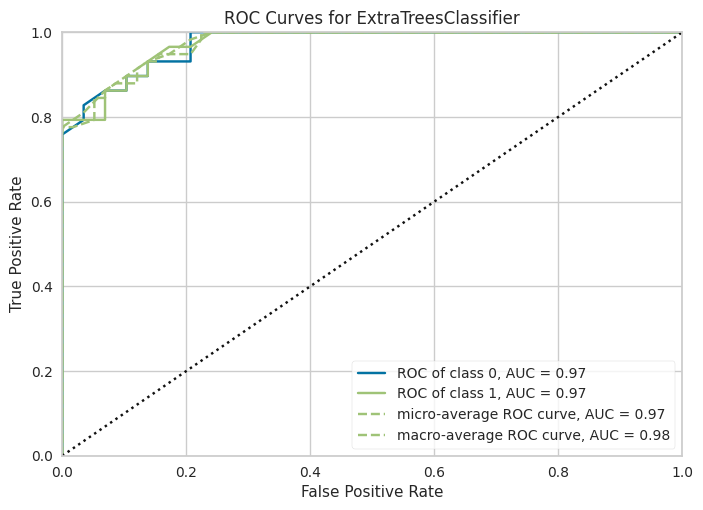

In [90]:
plot_model(ModeloFinal)

Nuestro modelo tiene un muy buen recall, que es la métrica en la que nos centramos, y muy buena puntuación en las demás métricas. Además de un AUC de 0.99 para ambas clases. Soprendente teniendo en cuenta la escasa cantidad de datos. Gracias a esto, podremos ayudar a predecir la enfermedad de Parkinson.